<img src="images/logos.png" alt="Banner" width="300"/>

<div>
    <font color=#690027 markdown="1">
        <h1>Statistiek in Python 2: Data visualiseren (cirkel- en staafdiagrammen)</h1> 
    </font>
</div>

We importeren eerst opnieuw de nodige modules.

In [1]:
import pandas as pd
import matplotlib
matplotlib.rcParams["axes.labelsize"] = 0

<div>
    <font color=#690027 markdown="1">
        <h2>1. Inleiding: Happydata</h2> 
    </font>
</div>

In dit notebook gebruiken we de *happydata* dataset. Deze dataset bevat de resultaten van een bevraging over hoe tevreden inwoners zijn met verschillende voorzieningen in hun stad. De deelnemers konden antwoorden met *unhappy*, *rather unhappy*, *indifferent*, *rather happy* en *happy*. Dit wil zeggen dat de steekproefvariabelen 5 waaren kunnen aannemen. 

We noemen dit soort steekproefvariabele een **kwalitatieve variabele** of een **categorische variabele**. Hierbij bestaat de data uit een vast aantal verschillende categorieën en kunnen we aan elk gegeven een categorie toekennen. We kunnen dan ook de absolute en relatieve frequentie berekenen door te tellen hoeveel rijen tot een bepaalde categorie behoren.
* Bron: https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset

Laad eerst zelf de *happydata* dataset in en print ze op het scherm. Het bestand is opgeslagen op de locatie `data/happydata_orig.csv`.

In [2]:
happydata = pd.read_csv("data/happydata.csv")
happydata

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
0,indifferent,indifferent,indifferent,rather happy,rather unhappy,rather happy,unhappy
1,indifferent,rather unhappy,indifferent,happy,rather happy,indifferent,unhappy
2,happy,indifferent,indifferent,indifferent,indifferent,happy,happy
3,happy,rather happy,indifferent,indifferent,indifferent,happy,unhappy
4,happy,rather happy,indifferent,indifferent,indifferent,happy,unhappy
...,...,...,...,...,...,...,...
138,happy,indifferent,indifferent,unhappy,indifferent,happy,unhappy
139,happy,rather unhappy,indifferent,rather happy,rather unhappy,happy,happy
140,happy,indifferent,indifferent,rather happy,rather happy,happy,happy
141,rather happy,indifferent,indifferent,rather happy,rather happy,happy,unhappy


### Opdracht 1.1

We willen graag meer informatie over de tevredenheid van de inwoners over de vastgoedprijzen in hun stad. Bereken hiertoe de absolute frequentietabel van de kolom `housecost`, sla ze op in de variabele `absolute_frequentie_vastgoed` en print ze op het scherm.

In [3]:
vastgoed = happydata["housecost"]
absolute_frequentie_vastgoed = vastgoed.value_counts()
absolute_frequentie_vastgoed

indifferent       46
rather unhappy    40
unhappy           30
rather happy      20
happy              7
Name: housecost, dtype: int64

### Opdracht 1.2

Het zou interresant zijn om te weten hoe de verschillende groepen zicht tot elkaar verhouden. Bereken wat de verhoudingen zijn tussen het aantal mensen dat *unhappy* heeft geantwoord en alle andere antwoorden.

<div class="alert alert-block alert-danger"> 
Je kan dit met de hand uitrekenen. Maar je kan hiervoor natuurlijk ook Python gebruiken.
</div>

In [4]:
absolute_frequentie_unhappy = absolute_frequentie_vastgoed["unhappy"]
absolute_frequentie_rather_unhappy = absolute_frequentie_vastgoed["rather unhappy"]
absolute_frequentie_indifferent = absolute_frequentie_vastgoed["indifferent"]
absolute_frequentie_rather_happy = absolute_frequentie_vastgoed["rather happy"]
absolute_frequentie_happy = absolute_frequentie_vastgoed["happy"]
print(absolute_frequentie_rather_unhappy/absolute_frequentie_unhappy)
print(absolute_frequentie_indifferent/absolute_frequentie_unhappy)
print(absolute_frequentie_rather_happy/absolute_frequentie_unhappy)
print(absolute_frequentie_happy/absolute_frequentie_unhappy)

1.3333333333333333
1.5333333333333334
0.6666666666666666
0.23333333333333334


Verhouding aantal keer *rather unhappy* tegenover aantal keer *unhappy*.

Antwoord: 1.33

Verhouding aantal keer *indifferent* tegenover aantal keer *unhappy*:

Antwoord: 1.53

Verhouding aantal keer *rather happy* tegenover aantal keer *unhappy*:

Antwoord: 0.67

Verhouding aantal keer *happy* tegenover aantal keer *unhappy*:

Antwoord: 0.23

<div>
    <font color=#690027 markdown="1">
        <h2>2. Cirkeldiagrammen</h2> 
    </font>
</div>

Dit was wellicht geen aangenaam werk. Bovendien is kijken naar een reeks getallen niet zo aantrekkelijk. Door de informatie uit de dataset te visualiseren in een diagram kan al veel informatie snel duidelijk worden.

Er zijn een hele hoop mogelijkheden om diagrammen te tekenen met Python. De makkelijk manier in deze context is om de `plot` functie uit de `pandas` module toe te passen op een absolute frequentietabel. Je kan dan via het argument `kind` aangeven wat voor grafiek je wilt tekenen. Door `pie` in te vullen kan je bijvoorbeeld een **cirkeldiagram** of **taartdiagram** tekenen.

### Voorbeeld 2.1

<AxesSubplot:ylabel='housecost'>

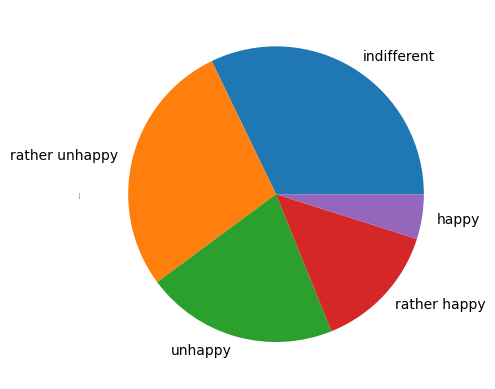

In [5]:
absolute_frequentie_vastgoed.plot(kind="pie")  # Teken een cirkeldiagram van de tevredenheid over de vastgoedprijzen.

### Opdracht 2.1

Genereer zelf een cirkeldiagram van de tevredenheid van de bewoners over de onderwijskwaliteit. Die kan je vinden in de kolom `schoolquality` in de `happydata` dataset. Kies zelf een gepaste titel.

<div class="alert alert-block alert-danger"> 
    Herinner je dat we voor een cirkeldiagram te genereren de absolute frequentietabel nodig hebben. 
</div>

<AxesSubplot:ylabel='schoolquality'>

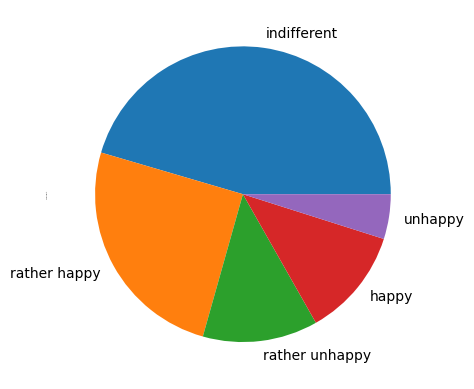

In [6]:
onderwijskwaliteit = happydata["schoolquality"]
absolute_frequentietabel_onderwijskwaliteit = onderwijskwaliteit.value_counts()
absolute_frequentietabel_onderwijskwaliteit.plot(kind="pie")

### Voorbeeld 2.2

Door het argument `title` aan de functie `plot` toe te voegen kan je een titel aan het diagram meegeven.

<AxesSubplot:title={'center':'Tevredenheid vastgoedprijzen'}, ylabel='housecost'>

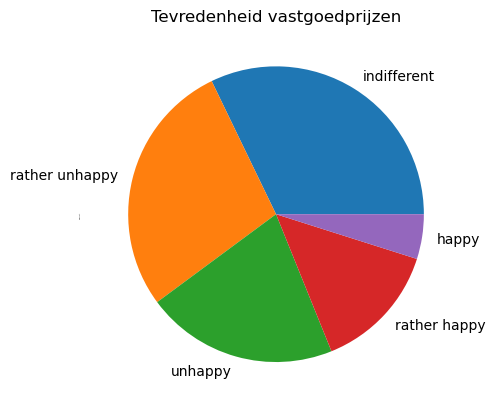

In [7]:
absolute_frequentie_vastgoed.plot(kind="pie", title="Tevredenheid vastgoedprijzen")  # Teken hetzelfde cirkeldiagram met een titel

### Opdracht 2.2

Herteken het cirkeldiagram uit opdracht 2.1 en voeg een duidelijke titel toe.m

<AxesSubplot:title={'center':'Tevredenheid onderwijskwaliteit'}, ylabel='schoolquality'>

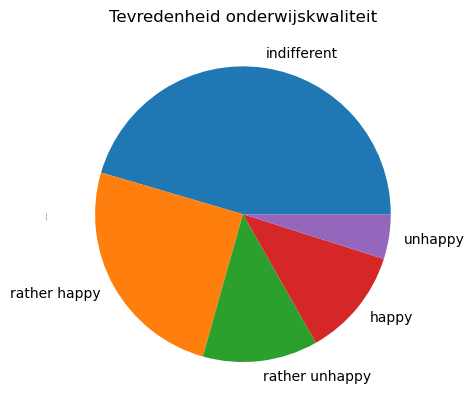

In [8]:
absolute_frequentietabel_onderwijskwaliteit.plot(kind="pie", title="Tevredenheid onderwijskwaliteit")

<div>
    <font color=#690027 markdown="1">
        <h2>3. Staafdiagrammen</h2> 
    </font>
</div>

Voor deze sectie te starten. Voer eerst de volgende code uit.

In [9]:
matplotlib.rcParams["axes.labelsize"] = "medium"

### Voorbeeld 3.1

We kunnen ook een **staafdiagram** tekenen door `kind="bar"` als argument in te geven. Hieronder een voorbeeld van een staafdiagram van de tevredenheid van de vastgoedprijzen.

<AxesSubplot:>

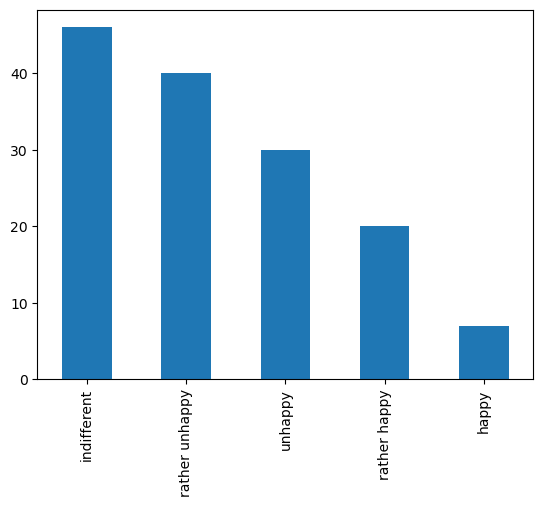

In [10]:
absolute_frequentie_vastgoed.plot(kind="bar")  # Teken een staafdiagram van de tevredenheid van de vastgoedprijzen

Deze diagrammen maken het al veel makkelijker om informatie uit een dataset samen te vatten. De `pandas` module biedt nog vele opties om de opmaak van diagrammen aan te passen. Zo kunnen we de duidelijkheid verhogen.

### Voorbeeld 3.2

Als eerste voegen we opnieuw een titel aan het diagram toe.

<AxesSubplot:title={'center':'Tevredenheid vastgoedprijzen'}>

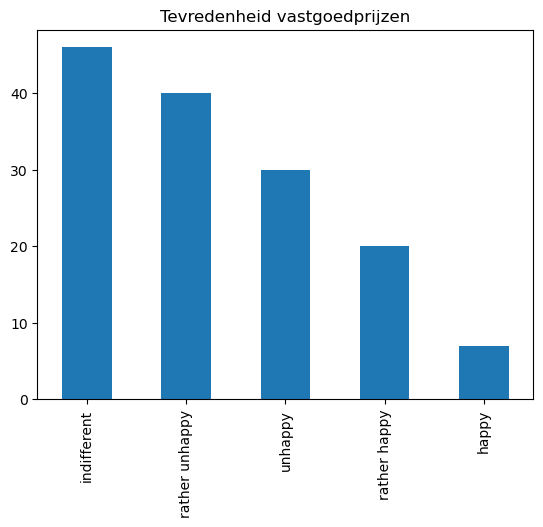

In [11]:
absolute_frequentie_vastgoed.plot(kind="bar", title="Tevredenheid vastgoedprijzen")  # Herteken het diagram met een titel

### Voorbeeld 3.3

Bij het opstellen van diagrammen is het belangrijk om duidelijk te maken wat voor data er precies wordt voorgesteld. Via de argumenten `xlabel` en `ylabel` kunnen we ook de horizontale en verticale as benoemen.

<AxesSubplot:title={'center':'Tevredenheid vastgoedprijzen'}, xlabel='Antwoord bevraging', ylabel='Absolute frequentie'>

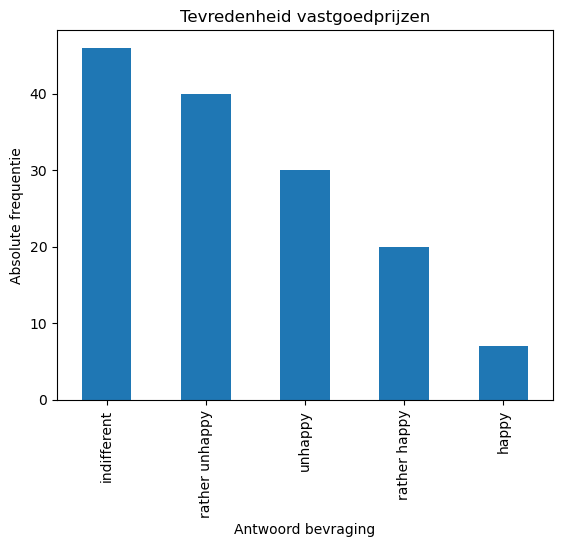

In [12]:
absolute_frequentie_vastgoed.plot(kind="bar", xlabel="Antwoord bevraging", ylabel="Absolute frequentie", title="Tevredenheid vastgoedprijzen")  # Herteken het diagram met gelabelde assen 

<div class="alert alert-block alert-danger"> 
    Indien van toepassing: Vergeet zeker ook niet om de eenheden van een steekproefvariabele te vermelden. Als we bijvoorbeeld afstand op een as willen uitzetten moet het duidelijk zijn of het gaat om meters, millimeters, kilometers,... 
</div>

### Voorbeeld 3.4

Verder staat een absolute frequentietabel in `pandas` standaard gesorteerd van de hoogste naar de laagste absolute frequentie. Het zou in ons geval overzichtelijker zijn om de horizontale as te sorteren van *unhappy* naar *happy*.

We kunnen dit aanpassen door de gewenste volgorde als lijst aan de functie `loc` door te geven en deze functie toe te passen op de absolute frequentietabel.

In [13]:
volgorde = ["unhappy", "rather unhappy", "indifferent", "rather happy", "happy"]  # Specifieer de gewenste volgorde via een lijst 
absolute_frequentie_vastgoed_gesorteerd = absolute_frequentie_vastgoed.loc[volgorde]  # Maak een nieuwe absolute frequentietabel met aangepaste volgorde
absolute_frequentie_vastgoed_gesorteerd  # Print de gesorteerde absolute frequentietabel op het scherp

unhappy           30
rather unhappy    40
indifferent       46
rather happy      20
happy              7
Name: housecost, dtype: int64

Het resultaat is een absolute frequentietabel in de volgorde die we hebben doorgegeven. Als we nu van deze gesorteerde absolute frequentietabel een staafdiagram tekenen krijgen we de gewenste grafiek.

<AxesSubplot:title={'center':'Tevredenheid vastgoedprijzen'}, xlabel='Antwoord bevraging', ylabel='Absolute frequentie'>

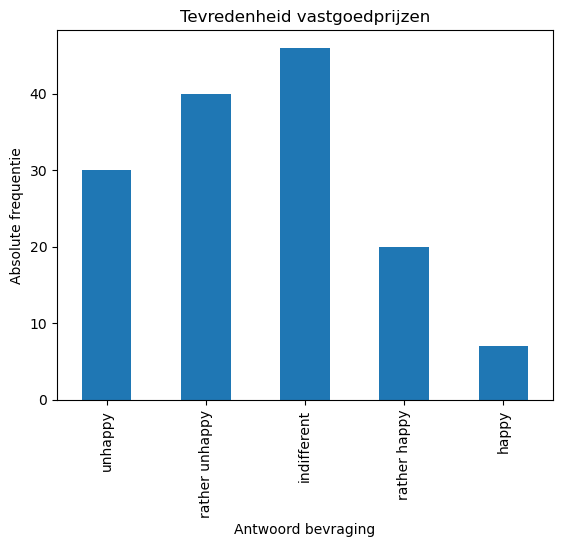

In [14]:
absolute_frequentie_vastgoed_gesorteerd.plot(kind="bar", xlabel="Antwoord bevraging", ylabel="Absolute frequentie", title="Tevredenheid vastgoedprijzen")  # Teken een nieuw staafdiagram met de correcte volgorde

### Opdracht 3.1

Maak nu zelf een staafdiagram van de tevredenheid over de `events`. Zorg dat de data gesorteerd staat van `unhappy` naar `happy`.

<AxesSubplot:>

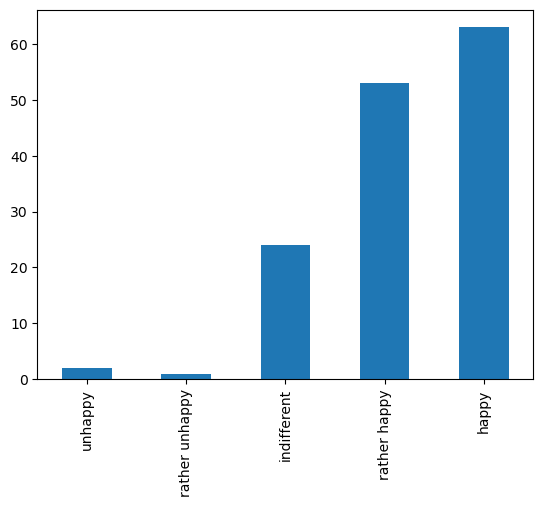

In [15]:
events = happydata["events"]
absolute_frequentie_events = events.value_counts()
absolute_frequentie_events.loc[volgorde].plot(kind="bar")

### Opdracht 3.2

Maak nu een nieuw staafdiagram maar met de relatieve frequenties van de kolom `policetrust` op de verticale as in plaats van de absolute frequenties.

<AxesSubplot:>

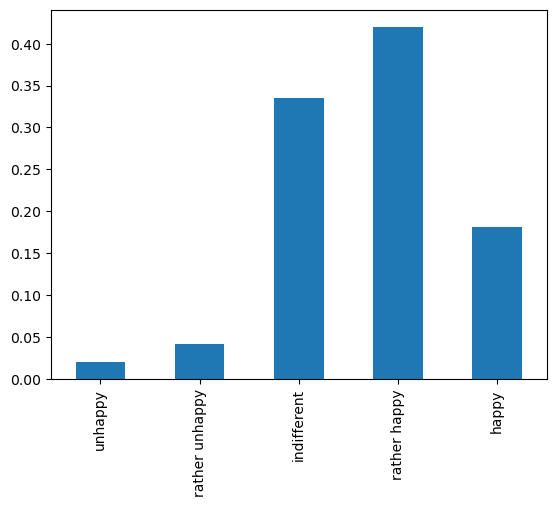

In [16]:
relatieve_frequentie_events = happydata["policetrust"].value_counts()/len(happydata)
relatieve_frequentie_events.loc[volgorde].plot(kind="bar")

<div class="alert alert-box alert-success">
Kijk eens terug naar de vorige notebook <i>Statistiek in Python 1: Absolute en relatieve frequentie</i> als je niet meer weet hoe je een relatieve frequentietabel moet opstellen.
</div>

Dit diagram kan voor sommige lezers misleidend overkomen. Waarom? 

Antwoord: De verticale as geeft niet alle waarden van 0 % tot 100 % weer

### Voorbeeld 3.5

We kunnen het interval van de waarden op de verticale as aanpassen via het `ylim` argument van de `plot` functie. Vergelijk het resultaat hieronder met *Voorbeeld 3.2*.

<AxesSubplot:>

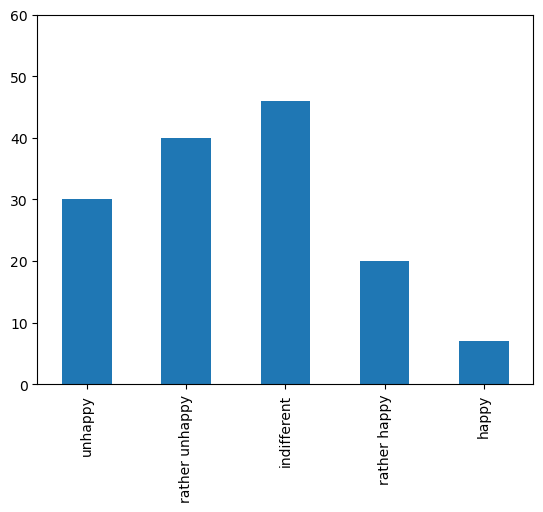

In [17]:
absolute_frequentie_vastgoed_gesorteerd.plot(kind="bar", ylim=(0,60))  # Teken een staafdiagram van de vastgoedprijzen, waarbij de horizontale as nu gaan van 0 tot 60

### Opdracht 3.3

Pas de grafiek van *Opdracht 1.4* aan zodat alle mogelijke relatieve frequentie tot en met 1 op de grafiek zichtbaar zijn.

<AxesSubplot:>

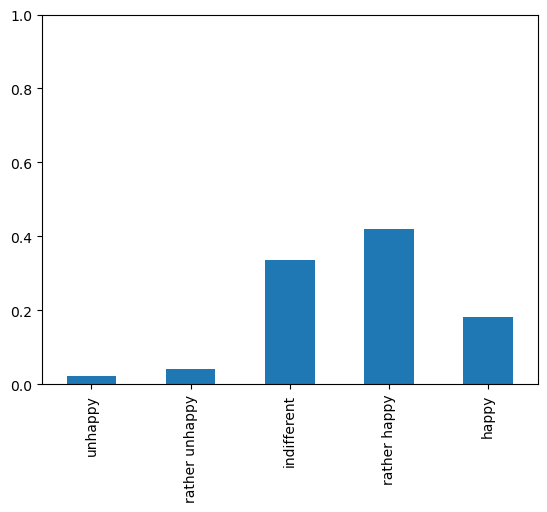

In [18]:
relatieve_frequentie_events.loc[volgorde].plot(kind="bar", ylim=(0,1))

### Opdracht 3.4

Onderstaand diagram stelt de relative frequentie voor van de kolom `happy`, die de algemene tevredenheid weergeeft. Dit diagram geeft de indruk dat de mensen veel vaker gelukkig invulden dan ongelukkig. Echter het verschil is in de realiteit veel kleiner. De ongelukkige keuze voor de waarden op de verticale as zorgt voor een vertekend beeld. In de media wordt dit nochtans vaak gedaan om de aandacht van de lezer te krijgen. 

<img src="images/fig_N2Opr1.6.png" width="500"/>

Herteken dit diagram met Python en maak zelf keuze voor een duidelijke verticale as. Zorg dat het diagram een titel heeft en dat de assen duidelijk gelabeld zijn.

<div class="alert alert-box alert-success">
Pandas heeft nog vele andere opties om diagrammen op te maken, te veel om in dit notebook uit te leggen. Je kan eens kijken in de online documentatie van Pandas en een aantal opties zelf uitproberen: 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html</a>
    

</div>

<AxesSubplot:title={'center':'Algemene tevredenheid'}, xlabel='Antwoorden bevraging', ylabel='Relatieve frequentie'>

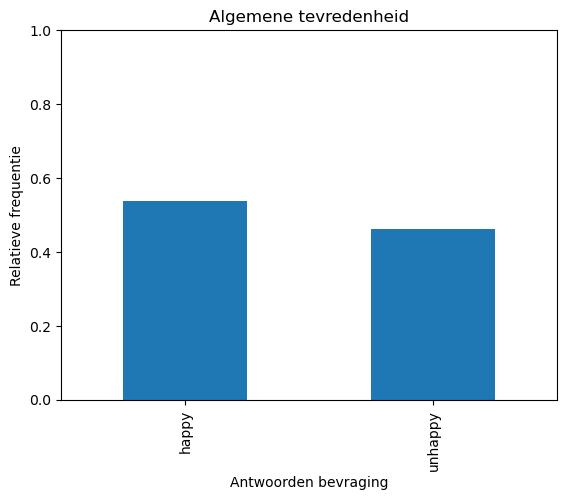

In [19]:
algemeen = happydata["happy"]
absolute_frequentie_algemeen = algemeen.value_counts()
relatieve_frequentie_algemeen = absolute_frequentie_algemeen/len(happydata)
relatieve_frequentie_algemeen.plot(kind="bar", ylim=(0,1), xlabel="Antwoorden bevraging", ylabel="Relatieve frequentie", title="Algemene tevredenheid")

### Referentielijst

Happiness Classification Dataset. https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>

Notebook python in wiskunde - Statistiek, van D. De Bolster, F. wyffels & N. Gesquière in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.